In [5]:
import pandas as pd
import numpy as np
import torch
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import BertTokenizer, BertModel
import torch
'''nltk.download('punkt')
nltk.download('stopwords')'''

"nltk.download('punkt')\nnltk.download('stopwords')"

In [6]:
df = pd.read_csv('embedding_100.csv')

In [2]:
df = pd.read_csv('1119_arxiv_api_i100.csv')

In [3]:
df['title'] = df['title'].str.lower()
df['summary'] = df['summary'].str.lower()

In [4]:
df

,pid,title,year,summary,author
0,100,concomitant enhancement of electron-phonon cou...,2020,the interplay between electron-electron inte...,"[Minhee Kang, Jinwoong Hwang, Ji-Eun Lee, Alex..."
1,200,exchange interaction effects in inter-landau l...,1997,we consider the influence of spin effects on...,"[E. Tsitsishvili, Y. Levinson]"
2,300,relativistic effects in the electronic structu...,1999,it has been shown that relativistic spin-orb...,"[R. J. Radwanski, Z. Ropka]"
3,400,effect of electron-phonon and electron-impurit...,2021,semiconductor superlattices have been extens...,"[Manoj Settipalli, Vitaly S Proshchenko, Sangh..."
4,500,nematic antiferromagnetism and deconfined crit...,2020,systems with strong electron-phonon coupling...,"[Chao Wang, Yoni Schattner, Steven A. Kivelson]"
...,...,...,...,...,...
83,9500,absence of the rashba effect in undoped asymme...,2008,to an electron moving in free space an elect...,"[P. S. Eldridge, W. J. H Leyland, J. D. Mar, P..."
84,9600,competing interactions and symmetry breaking i...,2009,competing interactions are often responsible...,[Johannes Bauer]
85,9700,probing onset of strong localization and elect...,2010,we have performed low-temperature transport ...,"[Shun-Tsung Lo, Kuang Yao Chen, T. L. Lin, Li-..."
86,9800,multi-orbital non-crossing approximation from ...,2011,we have developed a multi-orbital approach t...,"[Richard Korytár, Nicolás Lorente]"


In [54]:
data = df.to_dict(orient='records')

In [47]:
def embed_text(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word.lower() for word in tokens if word.isalnum() and word.lower() not in stop_words]
    return ' '.join(filtered_tokens)

for item in data:
    item['title'] = embed_text(item['title'])
    item['summary'] = embed_text(item['summary'])
    item['author'] = ' '.join(item['author'])

def vectorize_data(data):
    vectorizer = TfidfVectorizer()
    texts = [f"{item['title']} {item['summary']} {item['author']}" for item in data]
    X = vectorizer.fit_transform(texts)
    return X

X = vectorize_data(data)

In [48]:
dense_X = X.toarray()
print(dense_X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [52]:
dense_X[0].shape

(2704,)

In [54]:
print(X.shape)
print(X[0].shape)
print(X[1])

(98, 2704)
(1, 2704)
  (0, 2317)	0.09312052587979762
  (0, 991)	0.08061359885895436
  (0, 1453)	0.12001867483574756
  (0, 314)	0.12001867483574756
  (0, 1033)	0.08934633912581426
  (0, 1351)	0.12001867483574756
  (0, 2113)	0.09312052587979762
  (0, 1848)	0.11009136837210345
  (0, 862)	0.08061359885895436
  (0, 1485)	0.12001867483574756
  (0, 1282)	0.05454548702912818
  (0, 2400)	0.12001867483574756
  (0, 2238)	0.11009136837210345
  (0, 2041)	0.08607698985113586
  (0, 2495)	0.12001867483574756
  (0, 898)	0.10304783234344173
  (0, 1278)	0.05291263206851499
  (0, 1006)	0.07418993771920829
  (0, 824)	0.12001867483574756
  (0, 2179)	0.07418993771920829
  (0, 2328)	0.06244819016986434
  (0, 537)	0.10304783234344173
  (0, 2424)	0.11009136837210345
  (0, 2031)	0.10304783234344173
  (0, 2657)	0.12001867483574756
  :	:
  (0, 573)	0.08934633912581426
  (0, 1490)	0.08934633912581426
  (0, 111)	0.11009136837210345
  (0, 260)	0.12001867483574756
  (0, 1731)	0.11009136837210345
  (0, 1677)	0.12001867

In [64]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def embed_text_bert(text):
    tokens = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**tokens)
    embeddings = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
    return embeddings

for item in data:
    item['title_embedding'] = embed_text_bert(item['title'])
    item['summary_embedding'] = embed_text_bert(item['summary'])
    item['author_embedding'] = embed_text_bert(' '.join(item['author']))

print("Title Embedding:", data[0]['title_embedding'])
print("Summary Embedding:", data[0]['summary_embedding'])
print("Author Embedding:", data[0]['author_embedding'])

Title Embedding: [-1.83735527e-02  2.07721032e-02  3.62878479e-02 -1.70626566e-01
 -4.32801396e-01 -5.17548144e-01  7.90156499e-02 -7.14491084e-02
 -2.48462424e-01 -5.25572114e-02 -2.96375193e-02 -4.77992922e-01
 -2.78230280e-01  4.86196458e-01 -1.32751316e-01  4.75454241e-01
  2.60098279e-01  1.48619249e-01 -2.82996804e-01 -5.24987653e-02
  4.85096693e-01  2.52872199e-01 -2.73526847e-01  2.88205355e-01
  6.78971291e-01 -3.49864781e-01  1.19930550e-01  2.74270803e-01
  3.20552513e-02 -4.22544181e-01 -1.97319195e-01 -3.34065109e-02
  8.35948363e-02  9.16683793e-01  4.39983040e-01  2.69993454e-01
  1.07497506e-01 -2.51185477e-01 -1.35965660e-01 -6.30450249e-03
 -5.48521698e-01 -5.03470600e-01  1.56008720e-01  2.48071894e-01
 -4.08872813e-01 -4.29885328e-01  5.25521815e-01  4.77991432e-01
  1.43184751e-01 -6.12400115e-01 -4.46294159e-01 -1.68618292e-01
 -2.31133029e-01  7.35351205e-01 -8.59634280e-02  7.53730178e-01
 -3.45706701e-01 -5.95260739e-01  6.34929761e-02 -7.71795632e-03
 -1.9620

In [55]:
import numpy as np
import pandas as pd
import networkx as nx
from node2vec import Node2Vec

In [19]:
graph = nx.Graph()
for item in data:
    graph.add_node(item['pid'], label=item['summary'])  

edges = [(edge[0], edge[1]) for edge in graph.edges()]
node2vec_graph = Node2Vec(graph, dimensions=128, walk_length=10, num_walks=5)

model = node2vec_graph.fit(window=5, min_count=1)

node_embeddings = np.array([model.wv[str(node)] for node in graph.nodes()])
print(node_embeddings.shape)

Generating walks (CPU: 1): 100%|██████████| 5/5 [00:00<00:00, 7269.16it/s]

(98, 128)


In [20]:
node_embeddings[0].shape

(128,)

In [21]:
node_embeddings = np.array([model.wv[str(node)] for node in graph.nodes()])
average_embedding = np.mean(node_embeddings, axis=0)

In [25]:
sum_embedding = np.sum(node_embeddings, axis=1)

In [26]:
sum_embedding.shape

(98,)

In [27]:
sum_embedding

array([-5.91008812e-02, -3.02687939e-02,  6.03465959e-02, -1.42864883e-02,
       -5.68738282e-02, -1.09895840e-02,  4.32183556e-02, -2.96152383e-02,
        6.06128424e-02, -7.19903409e-02, -4.30043489e-02,  9.72025376e-03,
        3.60791348e-02, -9.10678878e-03, -6.14822283e-02,  1.31149203e-01,
        2.36615296e-02, -4.15199026e-02,  3.45515348e-02,  5.30422479e-02,
        6.32937402e-02,  4.83808294e-02, -3.60005833e-02, -4.15536053e-02,
        1.60947740e-02, -4.10413742e-03, -3.07959598e-02, -1.40480008e-02,
        1.07732005e-02, -1.13878310e-01,  2.92401742e-02,  1.95836425e-02,
       -3.92524488e-02, -1.71464719e-02,  1.05982095e-01,  4.18360755e-02,
       -1.31751355e-02,  6.72597215e-02, -3.16087808e-03,  6.45853579e-04,
       -3.71452868e-02,  7.24740475e-02,  9.98062044e-02, -4.74101827e-02,
       -5.31916060e-02,  4.96359654e-02,  2.19928287e-02,  3.06205302e-02,
        6.55170754e-02,  4.75896336e-02, -7.46258721e-03,  9.17803049e-02,
       -7.41385575e-03,  

Generating walks (CPU: 1): 100%|██████████| 5/5 [00:00<00:00, 9878.25it/s]


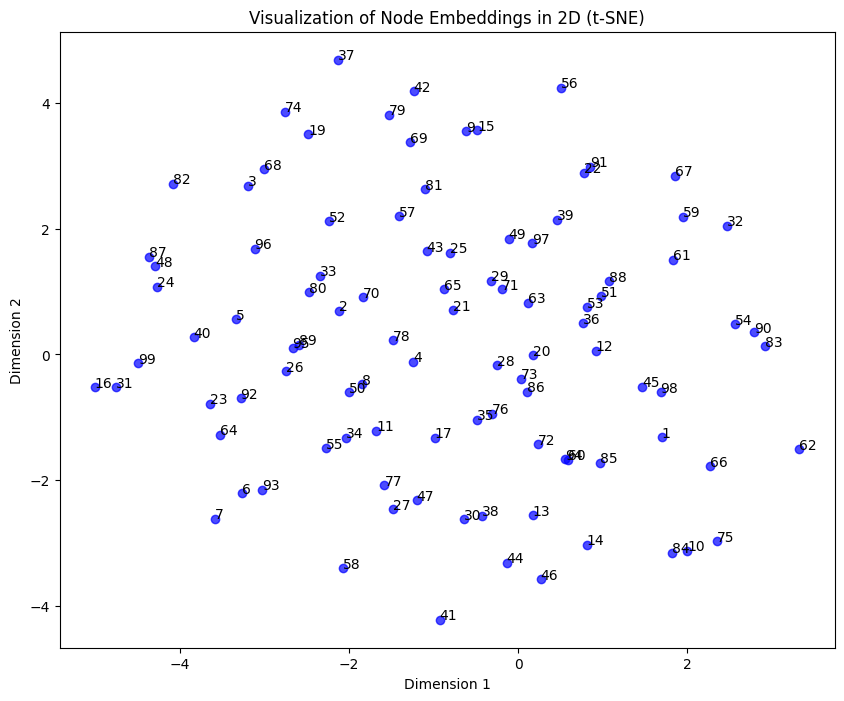

In [37]:
import networkx as nx
import numpy as np
from node2vec import Node2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

graph = nx.Graph()
for item in data:
    graph.add_node(item['pid'], label=item['summary'])

edges = [(edge[0], edge[1]) for edge in graph.edges()]

node2vec_graph = Node2Vec(graph, dimensions=128, walk_length=10, num_walks=5)
model = node2vec_graph.fit(window=5, min_count=1)

node_embeddings = np.array([model.wv[str(node)] for node in graph.nodes()])

tsne = TSNE(n_components=2, random_state=42)
node_embeddings_2d = tsne.fit_transform(node_embeddings)

plt.figure(figsize=(10, 8))
plt.scatter(node_embeddings_2d[:, 0], node_embeddings_2d[:, 1], color='blue', alpha=0.7)
plt.title("Visualization of Node Embeddings in 2D (t-SNE)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

for i, label in enumerate(graph.nodes()):
    plt.annotate(label, (node_embeddings_2d[i, 0], node_embeddings_2d[i, 1]))

plt.show()

In [48]:
df[df['pid'] ==41]['title'].values

array(['electron-electron scattering effects on the full counting statistics of  mesoscopic conductors'],
      dtype=object)

In [44]:
df[df['pid'] ==83]['title'].values

array(['sculpturing the electron wave function'], dtype=object)

In [47]:
df[df['pid'] ==74]['title'].values

array(['restoration of many electron wave functions from one-electron density'],
      dtype=object)

Generating walks (CPU: 1): 100%|██████████| 5/5 [00:00<00:00, 6782.51it/s]


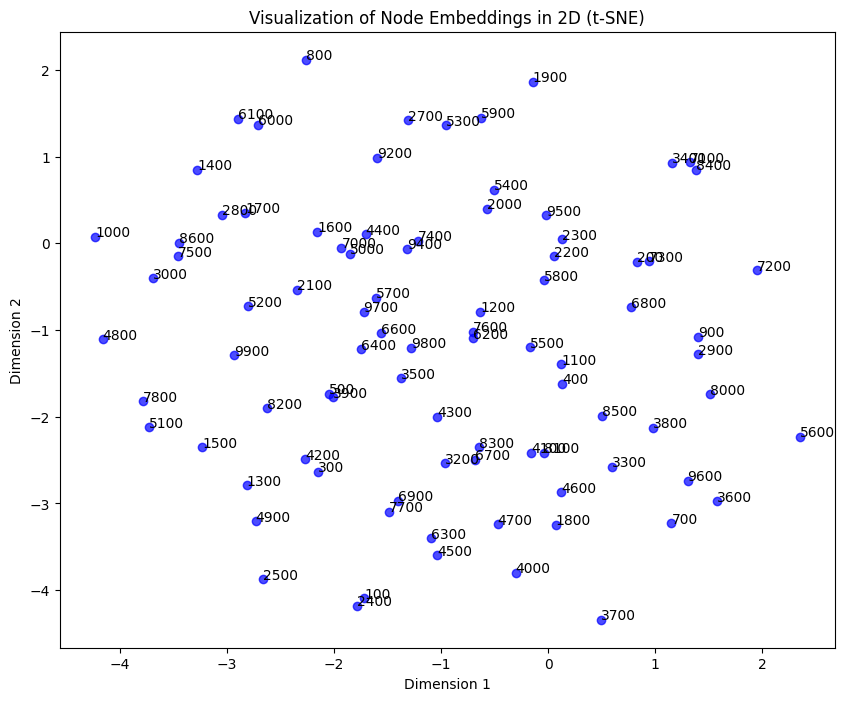

In [56]:
import networkx as nx
import numpy as np
from node2vec import Node2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

graph = nx.Graph()
for item in data:
    graph.add_node(item['pid'], label=item['summary'])

edges = [(edge[0], edge[1]) for edge in graph.edges()]

node2vec_graph = Node2Vec(graph, dimensions=128, walk_length=10, num_walks=5)
model = node2vec_graph.fit(window=5, min_count=1)

node_embeddings = np.array([model.wv[str(node)] for node in graph.nodes()])

tsne = TSNE(n_components=2, random_state=42)
node_embeddings_2d = tsne.fit_transform(node_embeddings)

plt.figure(figsize=(10, 8))
plt.scatter(node_embeddings_2d[:, 0], node_embeddings_2d[:, 1], color='blue', alpha=0.7)
plt.title("Visualization of Node Embeddings in 2D (t-SNE)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

for i, label in enumerate(graph.nodes()):
    plt.annotate(label, (node_embeddings_2d[i, 0], node_embeddings_2d[i, 1]))

plt.show()

In [7]:
df

,pid,title,year,summary,author
0,1,Frustratingly Easy Meta-Embedding -- Computing...,2018,Creating accurate meta-embeddings from pre-t...,"[Joshua Coates, Danushka Bollegala]"
1,2,Discrete Word Embedding for Logical Natural La...,2020,We propose an unsupervised neural model for ...,"[Masataro Asai, Zilu Tang]"
2,3,Hash Embeddings for Efficient Word Representat...,2017,"We present hash embeddings, an efficient met...","[Dan Svenstrup, Jonas Meinertz Hansen, Ole Win..."
3,4,Gender Bias in Meta-Embeddings,2022,Different methods have been proposed to deve...,"[Masahiro Kaneko, Danushka Bollegala, Naoaki O..."
4,5,Unsupervised Framework for Evaluating and Expl...,2023,An embedding is a mapping from a set of node...,"[Ashkan Dehghan, Kinga Siuta, Agata Skorupka, ..."
...,...,...,...,...,...
94,95,The Secret Lives of Names? Name Embeddings fro...,2019,Your name tells a lot about you: your gender...,"[Junting Ye, Steven Skiena]"
95,96,Deep Distributional Sequence Embeddings Based ...,2019,Deep metric learning employs deep neural net...,"[Ahmed Abdelwahab, Niels Landwehr]"
96,97,Compositional Embeddings for Multi-Label One-S...,2020,We present a compositional embedding framewo...,"[Zeqian Li, Michael C. Mozer, Jacob Whitehill]"
97,98,Learning Efficient Task-Specific Meta-Embeddin...,2020,Word embeddings are trained to predict word ...,"[Jingyi He, KC Tsiolis, Kian Kenyon-Dean, Jack..."
